In [1]:
import numpy as np
import matplotlib .pyplot as plt

In [2]:
def cost(x,y,w,b):
    m=len(x)
    j=0
    for i in range(m):
        fwb_x=w*x[i]+b
        j+=(fwb_x-y[i])**2
    j/=(2*m)
    return j

In [3]:
def compute_gradient(x,y,w,b):
    m=len(x)
    dj_dw=0
    dj_db=0
    for i in range(m):
        fwb_x=w*x[i]+b
        dj_dw+=(fwb_x-y[i])*x[i]
        dj_db+=(fwb_x-y[i])
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db

In [16]:
def batch_gradient(x, y, w, b, alpha):
    prev_w = []
    prev_b = []
    cost_calculated = []
    while True:
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        temp_w = w - alpha * dj_dw
        temp_b = b - alpha * dj_db
        if w == temp_w and b == temp_b:
            break
        else:
            w = temp_w
            b = temp_b
            prev_w.append(w)
            prev_b.append(b)
            cost_calculated.append(cost(x, y, w, b))
    return cost_calculated, prev_b, prev_w


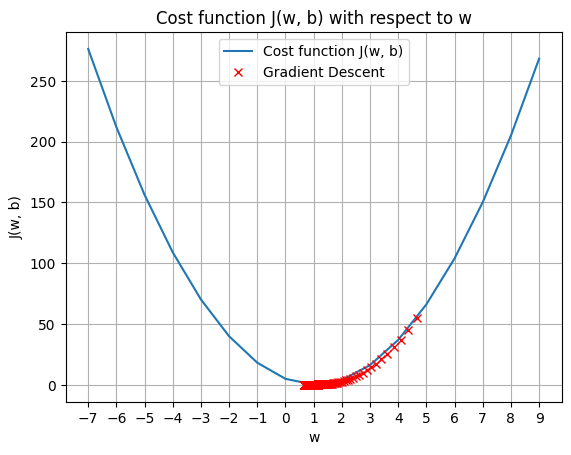

In [34]:
x = np.array([1, 4])
y = np.array([2, 4])
w = 5
b = 0

# Calculate the cost function J(w, b) for a range of w values
J = [cost(x, y, i, b) for i in range(-7, 10)]

# Perform batch gradient descent
G_j, G_b, G_w = batch_gradient(x, y, w, b, alpha=0.01)

# Plot the cost function J(w, b) with respect to w
plt.plot(range(-7, 10), J, label='Cost function J(w, b)')
plt.plot(G_w, G_j, 'rx', label='Gradient Descent')

plt.xlabel('w')
plt.ylabel('J(w, b)')
plt.title('Cost function J(w, b) with respect to w')
plt.xticks(range(-7, 10))
plt.grid(True)
plt.legend()
plt.show()